In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as pl


In [0]:
df = pd.read_csv('/content/diabetes.csv')

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


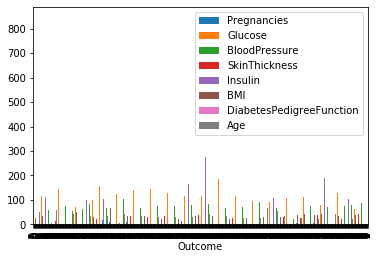

In [0]:
df.plot.bar('Outcome')

In [0]:
df.isnull().values.any()   #we are going to check any null values present or not

False

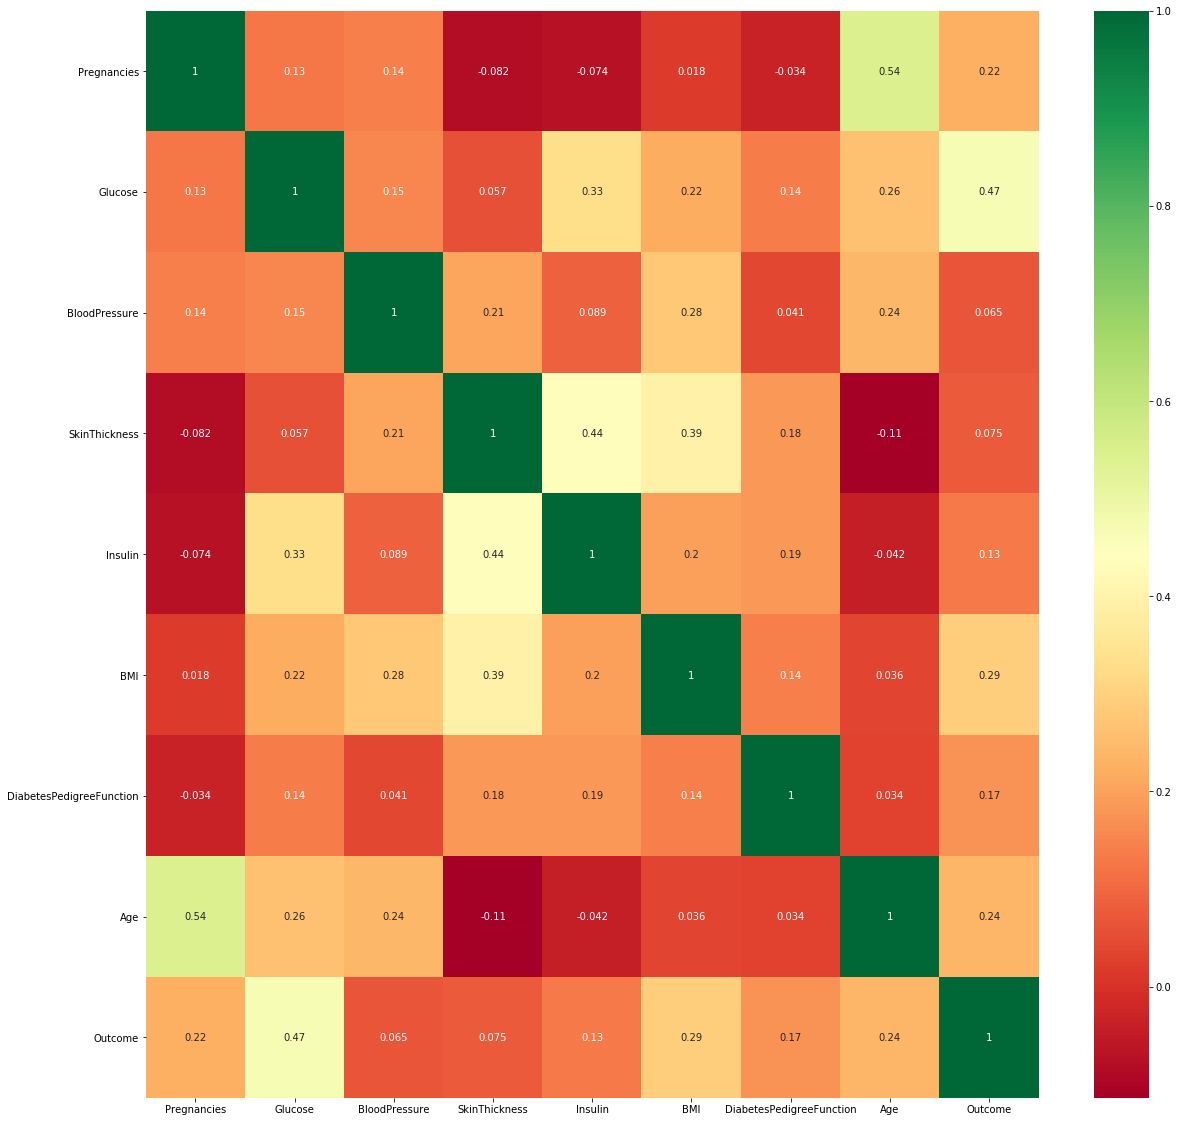

In [0]:
corrmat = df.corr()
top_corr_features = corrmat.index
pl.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [0]:
diabetes_map = { True:1 , False:0 }
df['diabetes'] = df['Outcome'].map(diabetes_map)

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [0]:
diabetes_true_count = len(df.loc[df['diabetes'] == True])
diabetes_false_count = len(df.loc[df['diabetes'] == False])

In [0]:
diabetes_true_count,diabetes_false_count

(268, 500)

In [0]:
# Now we will split our data into training and test data
from sklearn.model_selection import train_test_split

In [0]:
indep_feature = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
depen_feature = ['diabetes']

In [0]:
X = df[indep_feature].values
y = df[depen_feature].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [0]:
X_train

array([[2.00e+00, 8.90e+01, 9.00e+01, ..., 2.92e-01, 4.20e+01, 0.00e+00],
       [4.00e+00, 1.46e+02, 8.50e+01, ..., 1.89e-01, 2.70e+01, 0.00e+00],
       [1.00e+01, 1.11e+02, 7.00e+01, ..., 1.41e-01, 4.00e+01, 1.00e+00],
       ...,
       [3.00e+00, 1.16e+02, 7.40e+01, ..., 1.07e-01, 2.40e+01, 0.00e+00],
       [1.00e+00, 8.80e+01, 3.00e+01, ..., 4.96e-01, 2.60e+01, 1.00e+00],
       [5.00e+00, 9.60e+01, 7.40e+01, ..., 9.97e-01, 4.30e+01, 0.00e+00]])

In [0]:
print("Number of rows in the dataset :{0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

Number of rows in the dataset :768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [0]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train , y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predict_train_data = random_forest.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))


Accuracy = 0.745


In [0]:
## Hyper Parameter Optimization for XGBoost model

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [0]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [0]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [0]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 2.69 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


In [0]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [0]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [0]:
score


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
score.mean()


1.0